# Shallow Introduction to Deep Learning
1. Data generation
2. Data visualization
3. Data split
4. Model build
5. Train
6. Evaluate the model


## 1. Packages
First we import all the required packages
1. Keras will we our deep learning backend
2. Numpy will be used for operations
3. Matplotlib and seaborn will be used for plotting

In [15]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Input
from keras.optimizers import Adam, RMSprop
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data generation
We will generate some toy data for blood preassure.

x = distolic and syntolic preassures


y = patient label, healthy 1 or unhealthy 0

In [35]:
size = 100000

size_h = int(size/4)
size_u = int(size/6)

hx = np.hstack([np.random.uniform(low=40, high=64, size=size_h), np.random.uniform(low=62, high=85, size=size_h)])
hy = np.hstack([np.random.uniform(low=91, high=135, size=size_h), np.random.uniform(low=70, high=135, size=size_h)])
ux = np.hstack([np.random.uniform(low=40, high=65, size=size_u), np.random.uniform(low=81, high=100, size=size_u), np.random.uniform(low=40, high=83, size=size_u)])
uy = np.hstack([np.random.uniform(low=70, high=95, size=size_u), np.random.uniform(low=70, high=190, size=size_u), np.random.uniform(low=134, high=190, size=size_u)])

x = np.vstack([list(zip(hx, hy)), list(zip(ux, uy))])
y = np.hstack([np.ones(len(hx)), np.zeros(len(ux))])

shuffle_idx = np.arange(len(x))
np.random.shuffle(shuffle_idx)

x = x[shuffle_idx]
y = y[shuffle_idx]

In [36]:
print(x.shape)
print(x)

(99998, 2)
[[ 66.57790648 169.45385229]
 [ 88.90833644 120.24345988]
 [ 63.24492302  78.35116793]
 ...
 [ 44.93708977 130.57416598]
 [ 96.41583732  88.41724448]
 [ 77.93549937 125.18594327]]


In [37]:
print(y.shape)
print(y)

(99998,)
[0. 0. 0. ... 1. 0. 1.]


## 3. Data visualization
Let's explore a little bit the generated data.

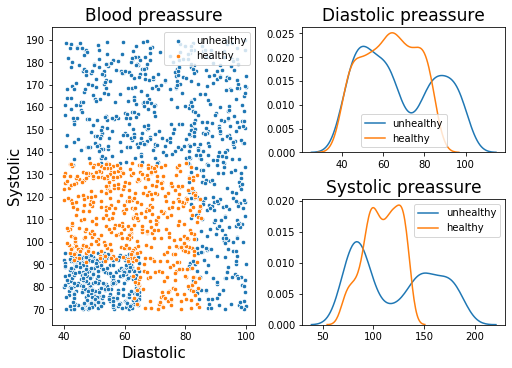

In [38]:
fig3 = plt.figure(constrained_layout=True, figsize=(7,5))
gs = fig3.add_gridspec(2, 2)

ru = np.random.choice(len(ux),1000)
rh = np.random.choice(len(hx),500)

# Plot Scatter points
f3_ax1 = fig3.add_subplot(gs[0:,0])
f3_ax1.set_title('Blood preassure', fontsize=17)
sns.scatterplot(ux[ru], uy[ru], label='unhealthy', s=20, ax=f3_ax1)
sns.scatterplot(hx[rh], hy[rh], label='healthy', s=20, ax=f3_ax1)
f3_ax1.set_yticks(np.arange(70,200, 10))
f3_ax1.set_xlabel('Diastolic', fontsize=15)
f3_ax1.set_ylabel('Systolic', fontsize=15)

#Plot Diastolic distributions
f3_ax2 = fig3.add_subplot(gs[0,1])
f3_ax2.set_title('Diastolic preassure', fontsize=17)
sns.distplot(ux[ru], label='unhealthy', ax=f3_ax2, hist=False)
sns.distplot(hx[rh], label='healthy', ax=f3_ax2, hist=False)

#Plot Syntolic distributions
f3_ax3 = fig3.add_subplot(gs[1,1])
f3_ax3.set_title('Systolic preassure', fontsize=17)
sns.distplot(uy[ru], label='unhealthy', ax=f3_ax3, hist=False)
sns.distplot(hy[rh], label='healthy', ax=f3_ax3, hist=False)

plt.show()

## 4. Data split
To know if we are overfitting, we need to know how good is our model at generalizing the problem. Thus, we need to split our data into train and test splits. 

The train data will be used to train the model, while the test data will be used to validate it.

The training split will be 80% of our data, and the test split will be the remmaining 20%

In [39]:
split = 0.8

train_x, train_y = x[:int(len(x) * split)], y[:int(len(y) * split)]
test_x, test_y = x[int(len(x) * split):], y[int(len(y) * split):]

print(x.shape, y.shape)
print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)

(99998, 2) (99998,)
(79998, 2) (79998,)
(20000, 2) (20000,)


## 5. Model
Let's build out first model! We will be using Keras

In [44]:
# Initialize empty model:
model = Sequential()

# Create hidden layer:
model.add(Dense(100, input_shape=(train_x.shape[1],), activation='relu'))

# Add dropout to avoid overfitting:
model.add(Dropout(0.1))

# Create hidden layer:
model.add(Dense(10, input_shape=(train_x.shape[1],), activation='relu'))

# Add dropout to avoid overfitting:
model.add(Dropout(0.1))


# Add output layer
model.add(Dense(1, activation='sigmoid'))

# Compile model:
opt = Adam()
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])


model.summary()

history = model.fit(train_x, train_y,
          epochs=100,
          batch_size=128,
          validation_data=(test_x, test_y),
          verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 100)               300       
_________________________________________________________________
dropout_37 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 10)                1010      
_________________________________________________________________
dropout_38 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 11        
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________
Train on 79998 samples, validate on 20000 samples
Epoch 1/100
 - 2s - loss: 0.8420 - acc: 0.5071 - val_loss: 0.6928 - val_acc: 0.5016
Epoch 

Epoch 86/100
 - 1s - loss: 0.2081 - acc: 0.9016 - val_loss: 0.1907 - val_acc: 0.9192
Epoch 87/100
 - 1s - loss: 0.2049 - acc: 0.9028 - val_loss: 0.1599 - val_acc: 0.9282
Epoch 88/100
 - 1s - loss: 0.2044 - acc: 0.9035 - val_loss: 0.1823 - val_acc: 0.9174
Epoch 89/100
 - 1s - loss: 0.2095 - acc: 0.9008 - val_loss: 0.1992 - val_acc: 0.9163
Epoch 90/100
 - 1s - loss: 0.2052 - acc: 0.9024 - val_loss: 0.2058 - val_acc: 0.9113
Epoch 91/100
 - 1s - loss: 0.2034 - acc: 0.9032 - val_loss: 0.1757 - val_acc: 0.9239
Epoch 92/100
 - 1s - loss: 0.2019 - acc: 0.9047 - val_loss: 0.1653 - val_acc: 0.9244
Epoch 93/100
 - 1s - loss: 0.2032 - acc: 0.9046 - val_loss: 0.2168 - val_acc: 0.9030
Epoch 94/100
 - 1s - loss: 0.2058 - acc: 0.9021 - val_loss: 0.2284 - val_acc: 0.8942
Epoch 95/100
 - 1s - loss: 0.1998 - acc: 0.9045 - val_loss: 0.1725 - val_acc: 0.9192
Epoch 96/100
 - 1s - loss: 0.2044 - acc: 0.9030 - val_loss: 0.2028 - val_acc: 0.9102
Epoch 97/100
 - 1s - loss: 0.2037 - acc: 0.9035 - val_loss: 0.199

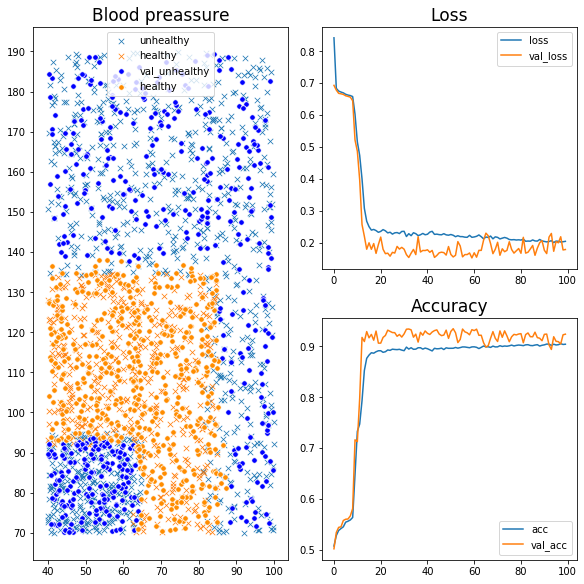

In [45]:
fig3 = plt.figure(constrained_layout=True, figsize=(8,8))
gs = fig3.add_gridspec(2, 2)

ru = np.random.choice(len(ux),1000)
rh = np.random.choice(len(hx),500)

# Plot Scatter points
f3_ax1 = fig3.add_subplot(gs[0:,0])
f3_ax1.set_title('Blood preassure', fontsize=17)
out = model.predict(test_x[:1000])[:,0]
f3_ax1.set_title('Blood preassure', fontsize=17)
sns.scatterplot(ux[ru], uy[ru], label='unhealthy', s=30, marker="x", ax=f3_ax1)
sns.scatterplot(hx[rh], hy[rh], label='healthy', s=30, marker="x", ax=f3_ax1)
sns.scatterplot(test_x[:1000][out < 0.5][:,0], test_x[:1000][out < 0.5][:,1], label='val_unhealthy', s=30, color='blue', ax=f3_ax1)
sns.scatterplot(test_x[:1000][out >= 0.5][:,0], test_x[:1000][out >= 0.5][:,1], label='healthy', s=30, color="darkorange", ax=f3_ax1)
f3_ax1.set_yticks(np.arange(70,200, 10))

#Plot Diastolic distributions
f3_ax2 = fig3.add_subplot(gs[0,1])
f3_ax2.set_title('Loss', fontsize=17)
f3_ax2.plot(history.history['loss'], label='loss')
f3_ax2.plot(history.history['val_loss'], label='val_loss')
f3_ax2.legend()

#Plot Syntolic distributions
f3_ax3 = fig3.add_subplot(gs[1,1])
f3_ax3.set_title('Accuracy', fontsize=17)
f3_ax3.plot(history.history['acc'], label='acc')
f3_ax3.plot(history.history['val_acc'], label='val_acc')
f3_ax3.legend()

plt.show()